# Ejercicio 1

- Presente el problema de optimización de PCA como un algoritmo generativo (reconstrucción o filtrado de datos), y compare el problema de optimización desde el punto de vista generativo vs. preservación de la varianza. (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)).



## 🧩 1. PCA como algoritmo generativo (reconstrucción)

Desde el punto de vista generativo, **PCA busca reconstruir los datos originales a partir de una representación de baja dimensión**. Es decir, se proyectan los datos a un espacio reducido, y luego se reconstruyen aproximaciones de los datos originales.

### 🔸 Supuestos del modelo:

Dado un conjunto de datos centrado $\mathbf{X} \in \mathbb{R}^{N \times P}$, se asume que existe una representación en espacio latente $\mathbf{Z} \in \mathbb{R}^{N \times M}$, con $M < P$, tal que:

$$
\mathbf{X} \approx \mathbf{Z} \mathbf{W}^T, \quad \text{donde } \mathbf{Z} = \mathbf{X} \mathbf{W}
$$

Aquí, $\mathbf{W} \in \mathbb{R}^{P \times M}$ contiene los vectores principales (direcciones de proyección).

### 🔹 Problema de optimización generativo:

Se busca minimizar el error de reconstrucción:

$$
\mathbf{W}^* = \arg \min_{\mathbf{W}} \| \mathbf{X} - \mathbf{X} \mathbf{W} \mathbf{W}^T \|_F^2 \quad \text{s.a. } \mathbf{W}^T \mathbf{W} = \mathbf{I}
$$

Esta formulación busca la mejor subespacio lineal de dimensión $M$ que **filtra** y reconstruye los datos con mínima pérdida.

---

## 📈 2. PCA como maximización de varianza

Otra forma equivalente de ver PCA es como el problema de encontrar un subespacio donde la **varianza de los datos proyectados sea máxima**. Esto se basa en la intuición de que la dirección con mayor varianza **contiene más información** de los datos.

### 🔹 Formulación del problema:

Dada la matriz de covarianza:

$$
\Sigma = \frac{1}{N} \mathbf{X}^T \mathbf{X}
$$

El problema de optimización es:

$$
\mathbf{W}^* = \arg \max_{\mathbf{W}} \operatorname{tr}(\mathbf{W}^T \Sigma \mathbf{W}) \quad \text{s.a. } \mathbf{W}^T \mathbf{W} = \mathbf{I}
$$

Aquí se busca que los datos proyectados $\mathbf{Z} = \mathbf{X} \mathbf{W}$ conserven la máxima varianza posible en las nuevas dimensiones.

---

## 🔁 Comparación entre los dos enfoques

| Aspecto                         | Punto de vista generativo                          | Punto de vista de varianza                             |
|---------------------------------|-----------------------------------------------------|--------------------------------------------------------|
| **Objetivo**                    | Reconstruir los datos originales                   | Retener la mayor cantidad de varianza                  |
| **Criterio**                    | Minimizar error cuadrático de reconstrucción       | Maximizar varianza proyectada                         |
| **Expresión**                   | $\| \mathbf{X} - \mathbf{X} \mathbf{W} \mathbf{W}^T \|_F^2$ | $\operatorname{tr}(\mathbf{W}^T \Sigma \mathbf{W})$ |
| **Restricción**                | $\mathbf{W}^T \mathbf{W} = \mathbf{I}$             | $\mathbf{W}^T \mathbf{W} = \mathbf{I}$                 |
| **Interpretación**             | Reconstrucción desde espacio latente               | Proyección óptima para análisis                        |
| **Resultado**                  | Vectores propios de $\Sigma$                       | Vectores propios de $\Sigma$                          |

---

### ✅ Conclusión

Ambos enfoques conducen **al mismo conjunto de vectores propios** de la matriz de covarianza $\Sigma$, pero tienen interpretaciones diferentes:

- El **generativo** modela una reconstrucción (útil como autoencoder lineal).
- El de **varianza** se enfoca en extracción de características relevantes.


# Ejercicio 2

- Presente un paralelo entre el problema de optimización de PCA y el de Kernel PCA.


##  Paralelo entre el problema de optimización de PCA y Kernel PCA

### 🧩 PCA: Análisis de Componentes Principales (lineal)

PCA busca una proyección lineal de los datos que maximice la varianza. Se formula como el siguiente problema de optimización:

$$
\max_{\mathbf{W}} \operatorname{tr}(\mathbf{W}^\top \Sigma \mathbf{W}) \quad \text{s.a. } \mathbf{W}^\top \mathbf{W} = \mathbf{I}
$$

donde $\Sigma = \frac{1}{N} \mathbf{X}^\top \mathbf{X}$ es la matriz de covarianza de los datos centrados.

✅ **Solución**: los vectores propios de $\Sigma$ asociados a los mayores autovalores.

---

### 🌀 Kernel PCA (KPCA)

KPCA extiende PCA a espacios **no lineales** mediante un mapeo implícito $\phi: \mathbb{R}^P \rightarrow \mathcal{F}$ a un espacio de características de alta dimensión. Se trabaja con la **matriz kernel**:

$$
K_{ij} = \kappa(\mathbf{x}_i, \mathbf{x}_j) = \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle
$$

El problema de optimización de KPCA se reduce a resolver:

$$
\mathbf{K} \boldsymbol{\alpha} = \lambda \boldsymbol{\alpha} \tag{7}
$$

Una vez obtenidos los autovalores y autovectores, la proyección de un nuevo punto se realiza como:

$$
\mathbf{z}_n = \sum_{r=1}^{N} \alpha_r \kappa(\mathbf{x}_n, \mathbf{x}_r) \tag{8}
$$

---

### 📊 Comparación PCA vs. KPCA

| Característica                    | PCA (lineal)                                           | Kernel PCA (no lineal)                                     |
|----------------------------------|--------------------------------------------------------|------------------------------------------------------------|
| Espacio de trabajo               | Original $\mathbb{R}^P$                                | Espacio transformado $\phi(\mathbb{R}^P) \rightarrow \mathcal{F}$ |
| Técnica                          | Autovalores de matriz de covarianza                   | Autovalores de matriz kernel                               |
| Núcleo (kernel)                 | Producto interno estándar                              | Núcleo definido por $\kappa(\mathbf{x}_i, \mathbf{x}_j)$   |
| Tipo de proyección               | Lineal: $\mathbf{z} = \mathbf{X} \mathbf{W}$           | No lineal: combinación de núcleos                         |
| Captura estructuras no lineales | ❌ No                                                  | ✅ Sí                                                       |
| Costo computacional              | Depende de $P$ (número de features)                   | Depende de $N$ (número de muestras)                        |

---

### ✅ Conclusión

- PCA encuentra direcciones lineales que maximizan la varianza de los datos.
- KPCA encuentra direcciones principales en un espacio de alta dimensión, **captando relaciones no lineales** gracias al uso de funciones núcleo.
- Ambos métodos comparten el objetivo de reducción de dimensión, pero **difieren en el espacio y las herramientas matemáticas** que utilizan.

La figura de Swiss Roll muestra cómo PCA (núcleo lineal) no puede desplegar la estructura interna, mientras que KPCA con kernel RBF o sigmoidal sí puede capturar la geometría no lineal del conjunto de datos.



# Ejercicio 3



1.  Consulte en que consiste el algoritmo [eigenfaces](https://direct.mit.edu/jocn/article/3/1/71/3025/Eigenfaces-for-Recognition). Compare el modelo de eigenfaces para reducción de dimensión con el algoritmo PCA. Aplique eigenfaces a Mnist sobre el conjunto `X_train` y grafique las dos primeras dimensiones con las imagenes originales sobre cada punto proyectado, y presente las cinco primeras "eigenfaces" en dibujo tipo imagen.


### 📦 Carga de datos y reducción con PCA

Se cargan las imágenes del conjunto MNIST, se normalizan y se toma una muestra de 1200 ejemplos. Luego, se aplica PCA para reducir la dimensión del conjunto, conservando el 90% de la varianza. Al final, se imprime cuántos componentes se conservaron.


In [14]:
# === Importaciones necesarias ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.datasets import fetch_openml

# === Cargar MNIST desde openml si no lo tienes ===
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # normalizar
y = y.astype(int)

# Submuestreo opcional para acelerar visualización
X_train = X[:1200]
y_train = y[:1200]

# === Aplicar PCA (Eigenfaces) conservando el 90% de la varianza ===
red = PCA(n_components=0.9)
Z = red.fit_transform(X_train)

# Mostrar cuántas dimensiones se conservaron
print(f"Número de componentes conservados: {red.n_components_}")
print("Shape de los vectores principales:", red.components_.shape)


Número de componentes conservados: 79
Shape de los vectores principales: (79, 784)


##🔍 Visualización de la proyección con imágenes y colores por clase

Primero se muestra cada imagen original del conjunto MNIST proyectada sobre el plano 2D obtenido con PCA. Luego, se genera un gráfico de dispersión donde cada punto representa una imagen y su color corresponde a la clase del dígito. Esto permite observar cómo se agrupan visualmente los datos tras la reducción de dimensión.


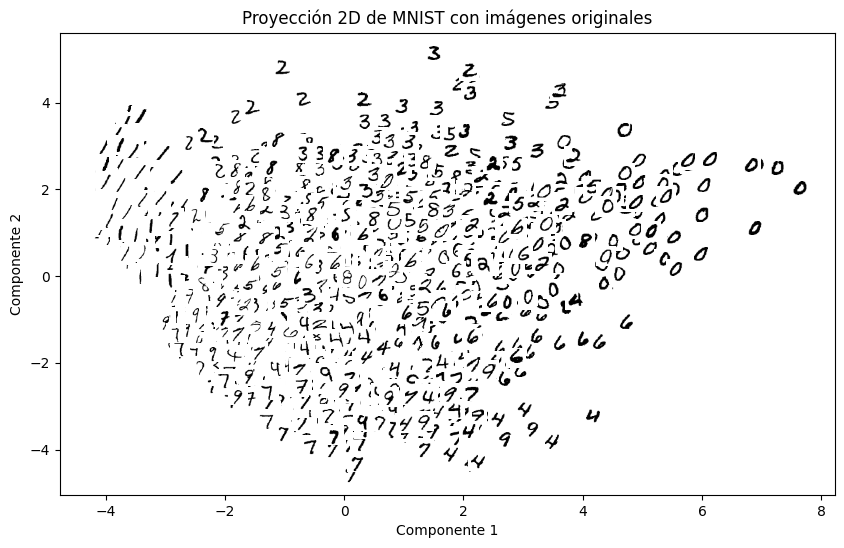

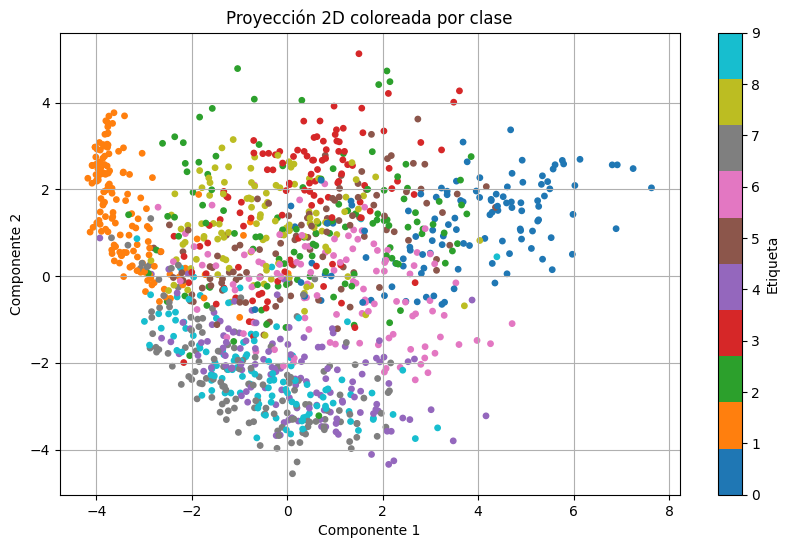

In [17]:
def plot_mnist_2d(Z, images, img_w=28, img_h=28, zoom=0.5, cmap='binary'):
    fig, ax = plt.subplots(figsize=(10, 6))
    for i in range(Z.shape[0]):
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom, cmap=cmap)
        ab = AnnotationBbox(im, (Z[i, 0], Z[i, 1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i, 0], Z[i, 1])])
    ax.autoscale()
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.title("Proyección 2D de MNIST con imágenes originales")
    plt.show()

# === Ejecutar la visualización con imágenes sobre la proyección 2D ===
plot_mnist_2d(Z, X_train, img_w=28, img_h=28, zoom=0.5, cmap='binary')

plt.figure(figsize=(10, 6))
plt.scatter(Z[:, 0], Z[:, 1], c=y_train, cmap="tab10", s=15)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Proyección 2D coloreada por clase")
plt.colorbar(label="Etiqueta")
plt.grid(True)
plt.show()


### 📸 Visualización de las primeras 5 eigenfaces

Se grafican las primeras cinco componentes principales obtenidas con PCA, conocidas como **eigenfaces**. Cada una representa un patrón visual básico que aparece con frecuencia en los dígitos del conjunto. Estas imágenes ayudan a interpretar qué tipo de variaciones captura PCA en los datos.


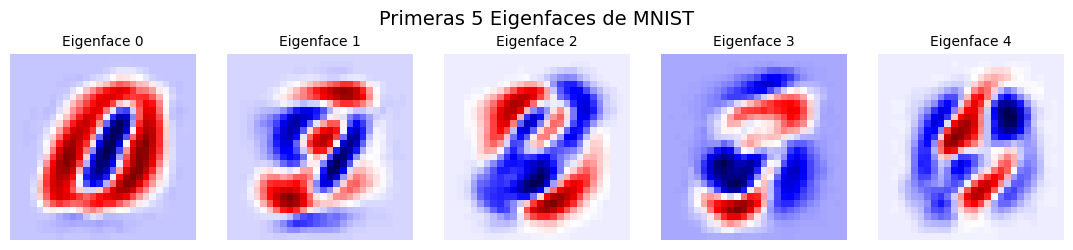

In [4]:
n_rows = 1
n_cols = 5
img_w = 28
img_h = 28

plt.figure(figsize=(n_cols * 2.2, n_rows * 2.5))

for i in range(n_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    eigenface = red.components_[i].reshape((img_w, img_h))
    plt.imshow(eigenface, cmap="seismic", interpolation="nearest")
    plt.title(f"Eigenface {i}", fontsize=10)
    plt.axis("off")

plt.suptitle("Primeras 5 Eigenfaces de MNIST", fontsize=14)
plt.tight_layout()
plt.show()


# **Ejercicio 3.2:**

2. Utilizando la base de datos muestreada Mnist en `X_train` y `y_train`, realice una análisis comparativo en términos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los métodos: PCA, kernel PCA rbf, t-SNE y UMAP. Utilice la librería [RAPIDS](https://rapids.ai/) a la hora de implementar los algoritmos, en caso de estar disponibles.

## ⚙️ Preparación de datos y entorno con RAPIDS

Se importan las librerías necesarias, incluyendo las versiones aceleradas por GPU de RAPIDS. Luego, se carga el conjunto MNIST, se normalizan los valores de píxeles y se toma una muestra de 4000 ejemplos para mejorar el rendimiento. Finalmente, se escalan los datos y se convierten a formato compatible con GPU mediante `cupy`.


In [6]:
# === IMPORTAR LIBRERÍAS ===
import cuml
import cupy as cp
import cuml.cluster
import cuml.decomposition
import cuml.metrics.cluster
from cuml.manifold import UMAP
from cuml.decomposition import PCA as cuPCA

from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# === CARGA Y PREPROCESAMIENTO ===
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(np.int32)

# Submuestreo para rendimiento
X_train = X[:4000]
y_train = y[:4000]

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Para RAPIDS (GPU)
X_gpu = cp.asarray(X_scaled)


## 🔍 Reducción de dimensión y evaluación con KMeans

Se aplican cuatro métodos de reducción de dimensión a los datos: PCA (GPU), Kernel PCA (CPU), t-SNE (CPU) y UMAP (GPU), todos reduciendo a dos dimensiones. Luego, se agrupan los puntos con KMeans (k=10) y se calcula el **coeficiente de silueta** para medir la calidad de los agrupamientos. Los resultados se almacenan para su comparación posterior.


In [8]:
def evaluate_projection(name, Z, use_gpu=True):
    # KMeans
    if use_gpu and isinstance(Z, cp.ndarray):
        kmeans = cuml.cluster.KMeans(n_clusters=10, random_state=42)
        y_pred = kmeans.fit_predict(Z)
        score = float(cuml.metrics.cluster.silhouette_score(Z, y_pred))
    else:
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=10, random_state=42)
        y_pred = kmeans.fit_predict(Z)
        score = silhouette_score(Z, y_pred)

    print(f"{name:15s} | Coef. Silueta: {score:.4f}")
    return name, score


results = []

# PCA (GPU)
pca = cuPCA(n_components=2)
Z_pca = pca.fit_transform(X_gpu)
results.append(evaluate_projection("PCA", Z_pca, use_gpu=True))

# Kernel PCA (CPU)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01)
Z_kpca = kpca.fit_transform(X_scaled)
results.append(evaluate_projection("KernelPCA RBF", Z_kpca, use_gpu=False))

# t-SNE (CPU)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca')
Z_tsne = tsne.fit_transform(X_scaled)
results.append(evaluate_projection("t-SNE", Z_tsne, use_gpu=False))

# UMAP (GPU)
umap = UMAP(n_components=2, n_neighbors=30, min_dist=0.1)
Z_umap = umap.fit_transform(X_gpu)
results.append(evaluate_projection("UMAP", Z_umap, use_gpu=True))


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


PCA             | Coef. Silueta: 0.3496
KernelPCA RBF   | Coef. Silueta: 0.7847
t-SNE           | Coef. Silueta: 0.4248
[2025-06-13 04:02:09.874] [CUML] [info] Building knn graph using brute force
UMAP            | Coef. Silueta: 0.4895


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


## 📊 Comparación de resultados

Se crea un gráfico de barras para visualizar y comparar el coeficiente de silueta obtenido por cada método de reducción de dimensión. Esto permite evaluar cuál técnica logró una mejor separación de los grupos en el espacio reducido.


<ipython-input-9-871820042>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x="Método", y="Coef Silueta", palette="viridis")


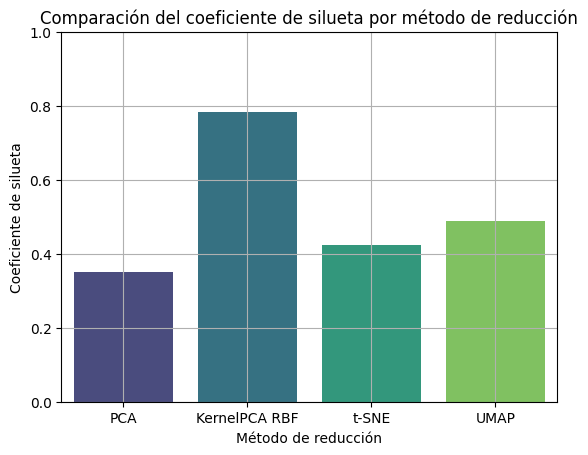

In [9]:
df_results = pd.DataFrame(results, columns=["Método", "Coef Silueta"])
sns.barplot(data=df_results, x="Método", y="Coef Silueta", palette="viridis")
plt.title("Comparación del coeficiente de silueta por método de reducción")
plt.ylim(0, 1)
plt.ylabel("Coeficiente de silueta")
plt.xlabel("Método de reducción")
plt.grid(True)
plt.show()
